#**Analyzing and Predicting Seoul’s Bike Rental Patterns with ML**

**Abstract:**
This project focuses on predicting bike rental demand using the Seoul Bike Sharing dataset. The data underwent preprocessing steps including handling outliers, encoding categorical variables, and addressing skewness. Feature selection was done using the SelectKBest algorithm, followed by scaling and model training. Multiple machine learning models were evaluated including Linear Regression, Random Forest, Decision Tree, and SVR. Random Forest emerged as the best model with the highest R² score.

**Objective:**
To build a predictive model that accurately forecasts bike rental counts based on weather and seasonal features.
To compare different regression algorithms and determine the most effective one.

**Project Info:**
This project is a machine learning-based analysis of Seoul's hourly bike rental data. The goal is to assist city planners and bike-sharing services in understanding demand patterns and improving resource allocation. The approach involves feature engineering, model evaluation, and performance comparison using Python and libraries like scikit-learn, pandas, seaborn, and matplotlib.

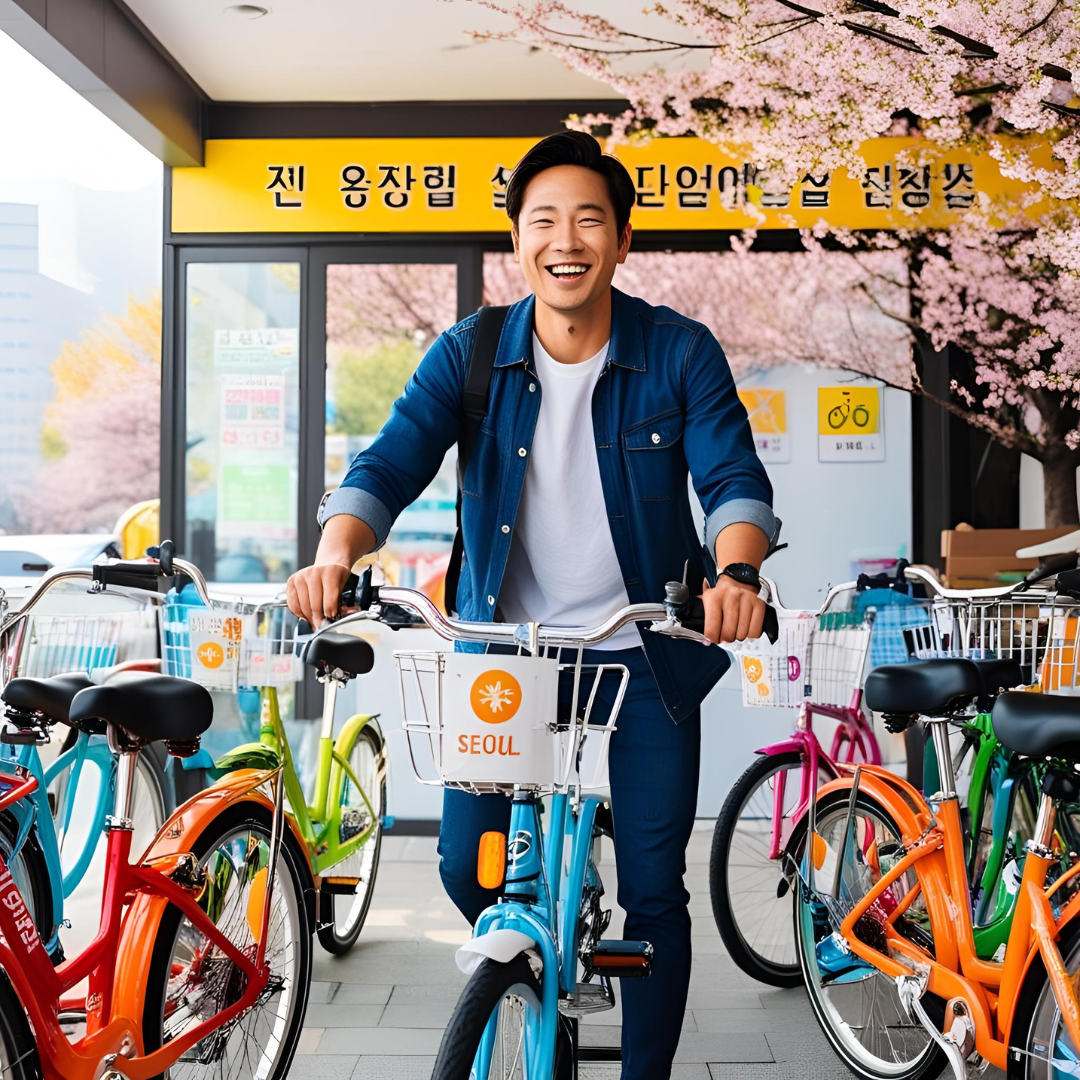

**Improting neccessary Librares:**

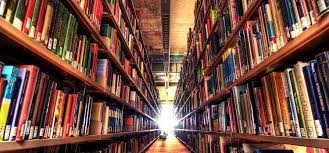

In [ ]:
import pandas as pd  # For working with data in tables (like Excel)
import numpy as np  # For numerical operations and handling arrays
import matplotlib.pyplot as plt  # For creating graphs and visualizations
import seaborn as sns  # For making prettier and more informative plots

from sklearn.preprocessing import OneHotEncoder  # To convert categorical values into numbers using 0s and 1s
from sklearn.preprocessing import PowerTransformer  # To fix skewness and normalize data
from scipy.stats import skew  # To measure how skewed a distribution is

from sklearn.feature_selection import SelectKBest, f_regression  # To pick the most important features for prediction

from sklearn.model_selection import train_test_split  # To split data into training and testing sets

from sklearn.preprocessing import StandardScaler  # To scale features so they’re on the same level

from sklearn.linear_model import LinearRegression  # To build a simple model that finds a straight-line relationship
from sklearn.ensemble import RandomForestRegressor  # A more powerful model using many decision trees
from sklearn.tree import DecisionTreeRegressor  # A model that splits data like a flowchart to make predictions
from sklearn.svm import SVR  # A model that tries to fit the data with a flexible curve (Support Vector Regression)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # Tools to measure how well the model did


**Upload the Data:**

In [ ]:
data = pd.read_csv('/content/SeoulBikeData.csv', encoding='latin-1')

**Convert into Dataset:**

In [ ]:
df=pd.DataFrame(data)

**Statistical Measure:**

Statistical measures are numbers that summarize your data, like the average (mean), middle value (median), or how spread out the values are (standard deviation). They help you understand the basic characteristics of your dataset.

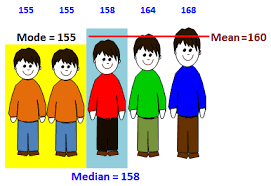

In [ ]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.shape

(8760, 14)

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

I checked the basic statistics of the dataset, such as mean, median, minimum, maximum, and standard deviation for all numerical columns.

This helped me understand how the data is distributed, identify differences in value ranges, and get a general idea of each feature’s behavior before moving on to model building.

-------------------------------------------------------------------------------

**Finding Missing values:**

This means checking your dataset for any blank or null entries. Missing values can affect analysis and model accuracy, so it’s important to find and handle them early in the data cleaning process.

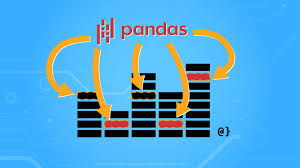

In [ ]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

I checked the dataset for any missing values using .isnull().sum().

The result showed that there are no missing values, so I didn’t need to perform any imputation or removal of data

--------------------------------------------------------------------------------

**Find Duplicate values:**

This means checking your data for repeated rows or entries. Duplicates can affect your results, so it’s important to catch and clean them to keep your data accurate

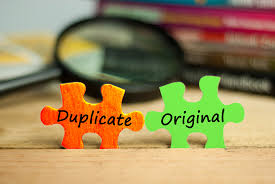

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Length: 8760, dtype: bool

In [ ]:
df.duplicated().sum()

np.int64(0)

I used .duplicated().sum() to check for duplicate rows in the dataset.

There were no duplicate values found, so no further action was needed.

------------

**Encoding(OneHotEncoder):**

OneHotEncoder is used to turn categorical data into numbers so machines can understand it. It creates new columns for each category and marks them with 1s and 0s to show where each category appears.

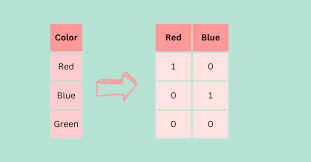

In [ ]:
categorical_cols = ['Seasons', 'Holiday', 'Functioning Day']
oh = OneHotEncoder(sparse_output=False, drop=None)
for col in categorical_cols:
    reshaped = df[col].values.reshape(-1, 1)
    encoded = oh.fit_transform(reshaped)
    encoded_df = pd.DataFrame(encoded, columns=[f"{col}_{cat}" for cat in oh.categories_[0]], dtype=int)
    df = pd.concat([df.drop(columns=[col]), encoded_df], axis=1)
print(df.head())

         Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Seasons_Autumn  \
0                      0.0           0.0            0.0               0   
1       

I used OneHotEncoder to convert categorical columns like 'Seasons', 'Holiday', and 'Functioning Day' into numerical format.

This helped make the data machine-learning-friendly by turning text categories into binary values without losing any information.

-------------------------------------------

**Finding Outliers:**

Finding outliers means spotting values in your data that are way different from the rest. These unusual points can mess with your analysis or model, so it’s important to detect and decide whether to keep, fix, or remove them.

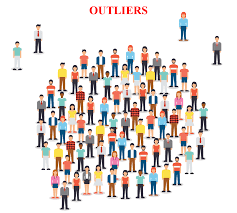

In [ ]:
num_columns=df.select_dtypes(include='number')
num_columns.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  Seasons_Autumn  Seasons_Spring  \
0           0.0            0.0               0               0   
1           0.0            0.0               0               0   
2           0.0            0.0               0               0   
3           0.0            0.0               0               0   
4           0.0            0.0               0               0   

   Seasons_Summer  Seasons_Winter  Holiday_Holiday  Holiday_No Holiday  \
0               0               1                0                   1   
1               0               1                0                   1   
2               0               1                0                   1   
3               0               1                0                   1   
4               0               1                0                   1   

   Functioning Day_No  Functioning Day_Yes  
0                   0                    1  
1                   0                    1  
2                   0                    1  
3                   0                    1  
4                   0                    1

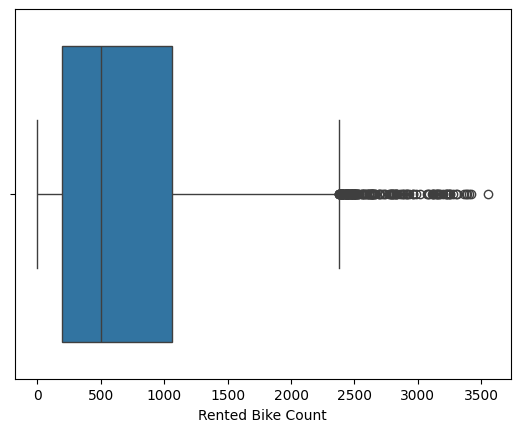

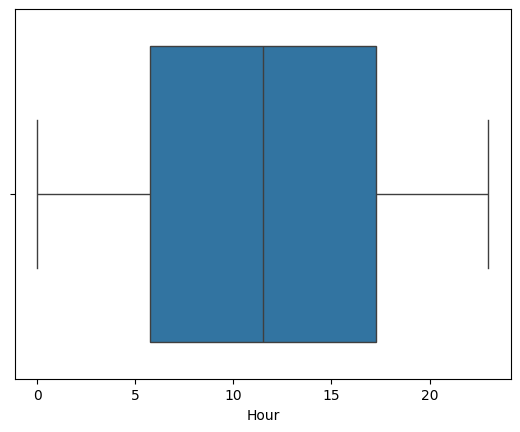

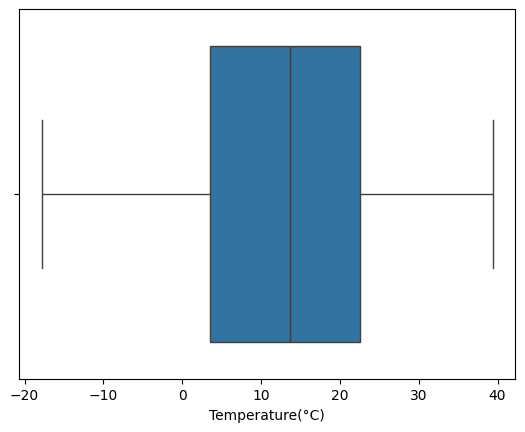

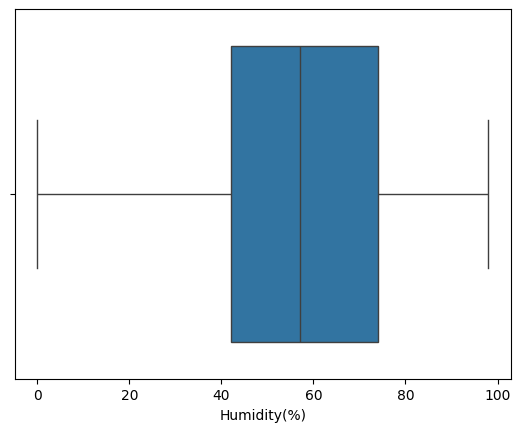

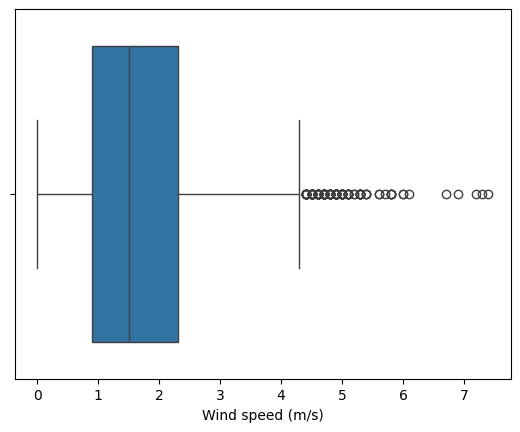

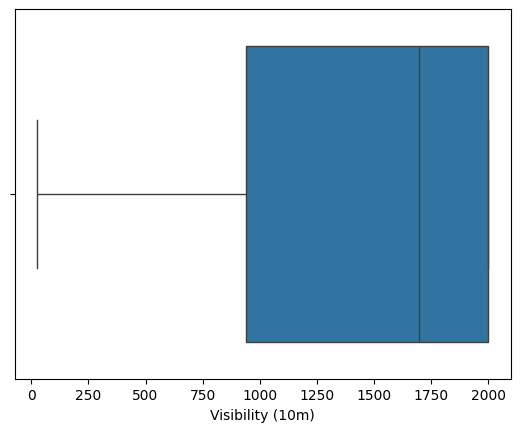

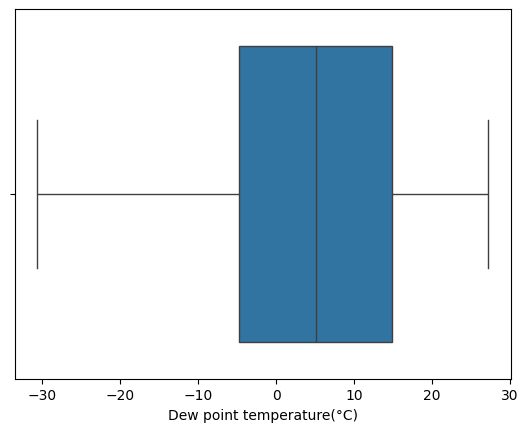

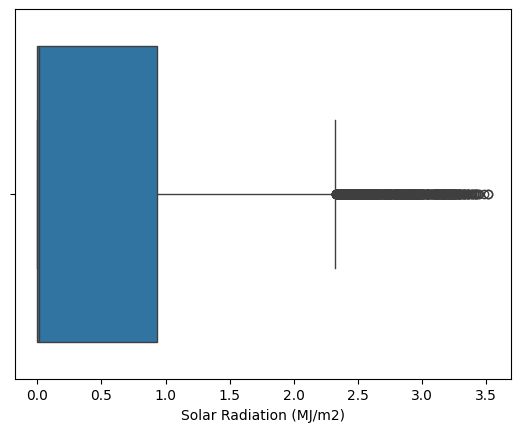

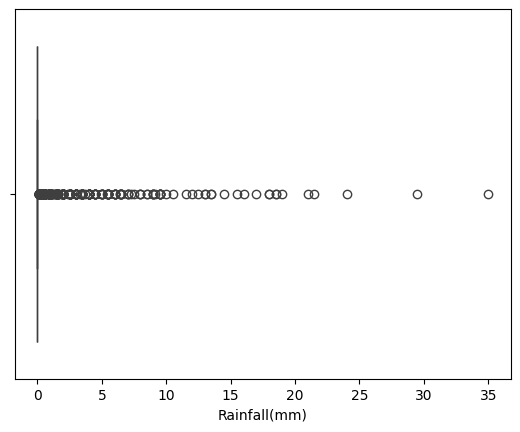

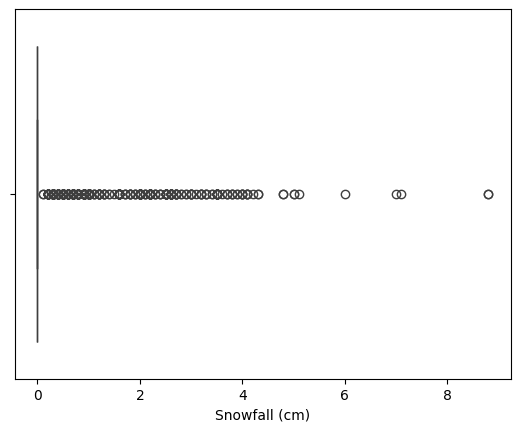

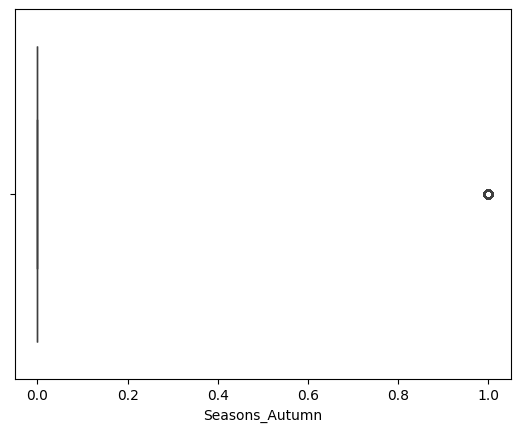

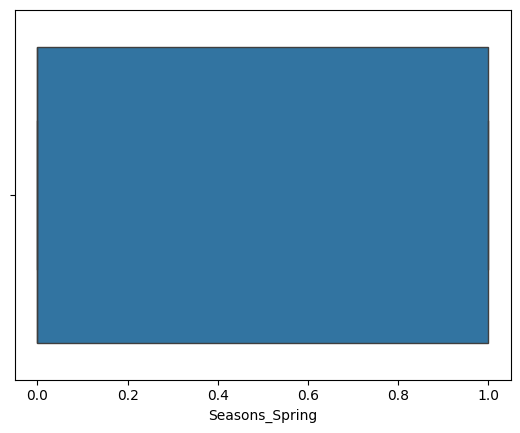

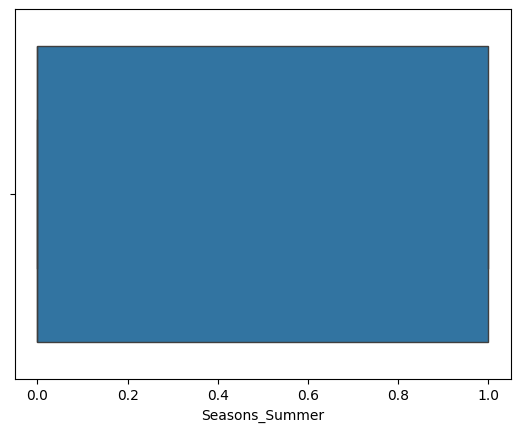

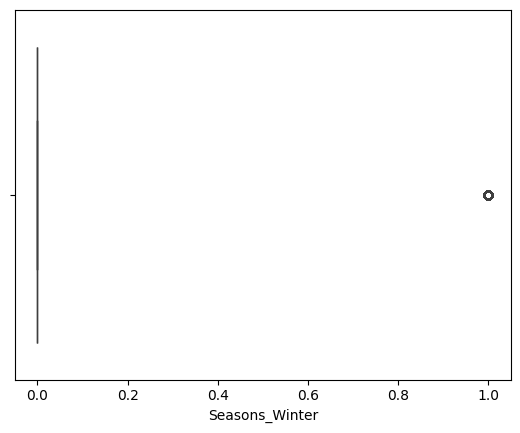

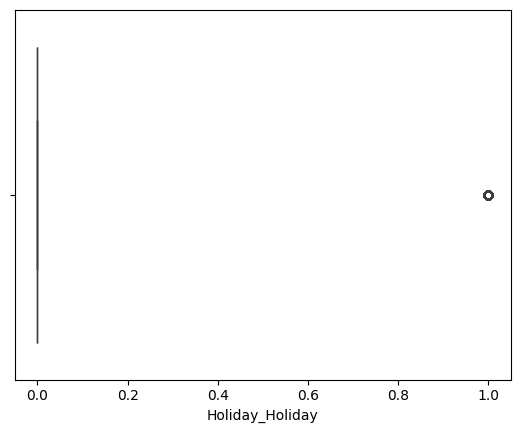

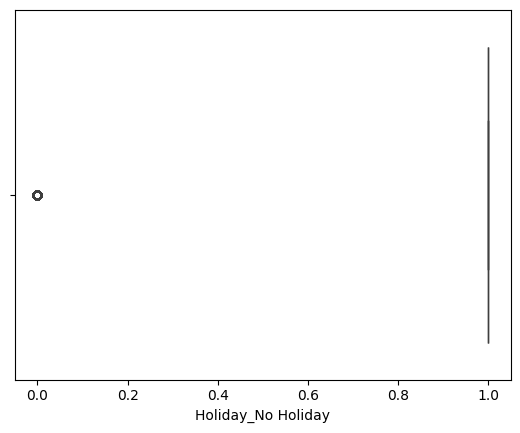

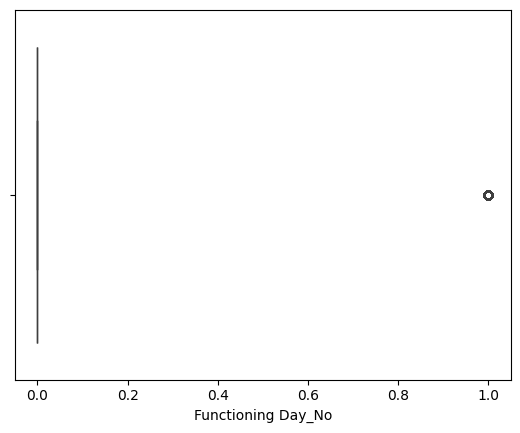

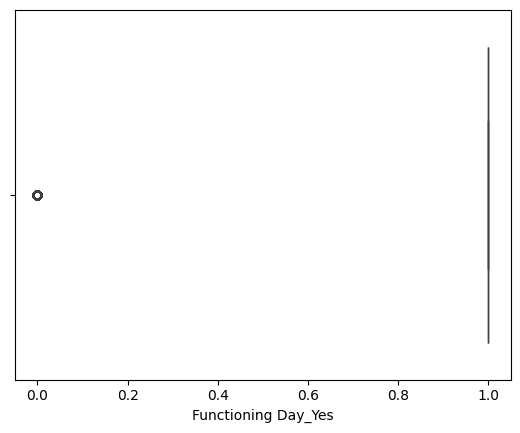

In [ ]:
for column in num_columns:
  sns.boxplot(data=num_columns,x=column)
  plt.show()

I used boxplots to visually inspect numerical columns for outliers.

Some features showed values outside the normal range, which indicated the presence of outliers in the dataset.

--------------------------

**Handling Outliers:**

Handling outliers means deciding what to do with values that are far outside the normal range of your data. You can remove them, cap them, or transform them to reduce their impact and keep your analysis or model accurate.

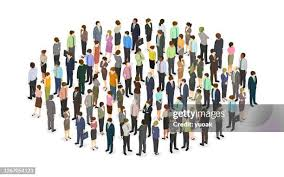

In [ ]:
def handling_outliers(df):

    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df

<Axes: >

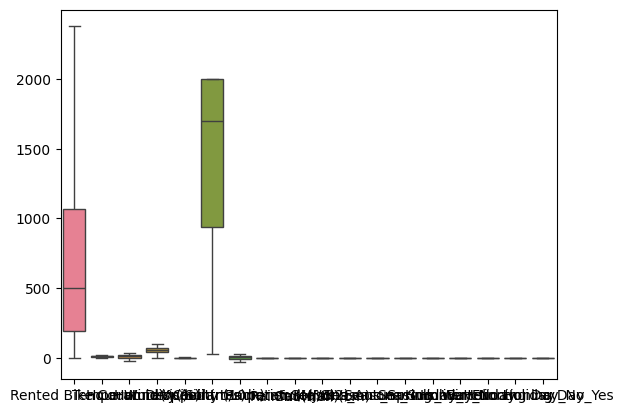

In [ ]:
df=handling_outliers(df)
df.head()
sns.boxplot(data=df)

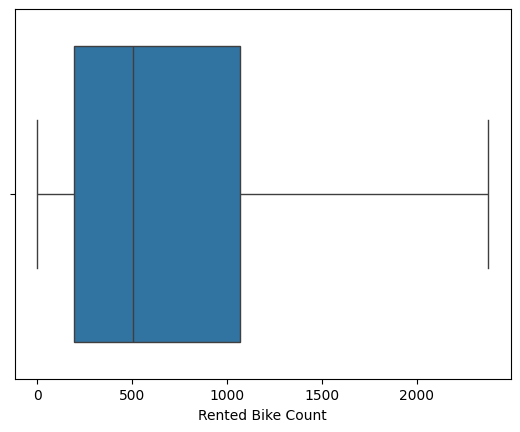

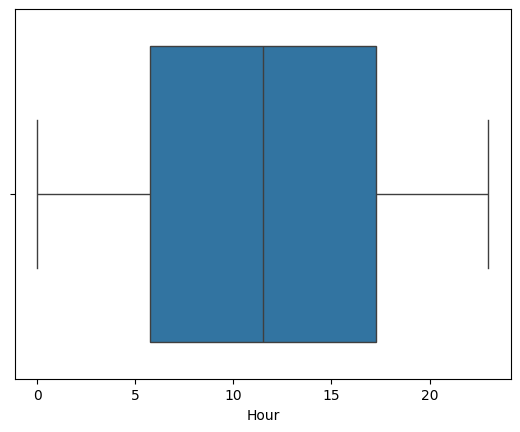

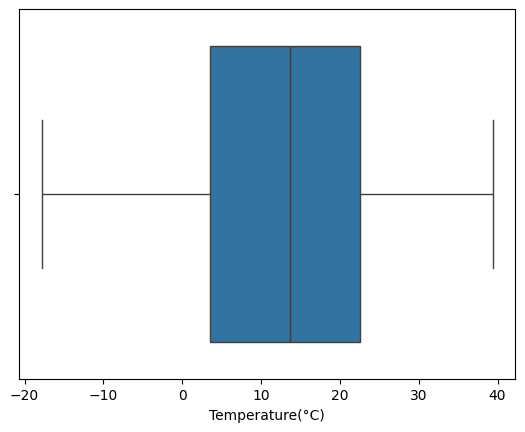

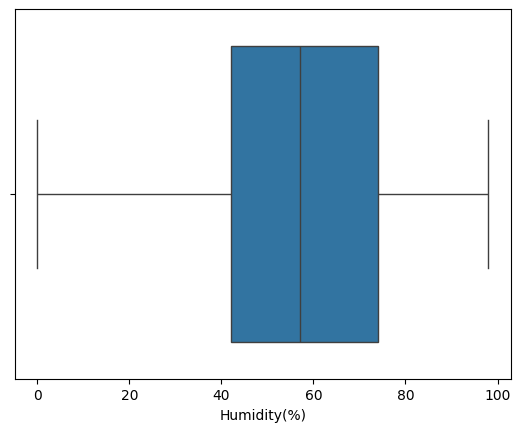

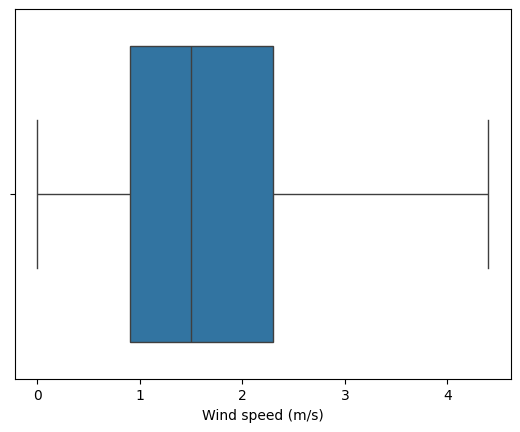

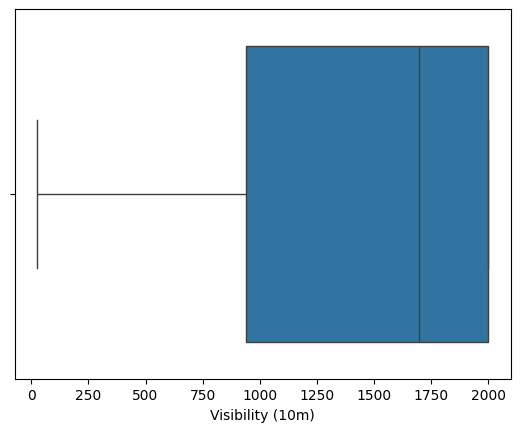

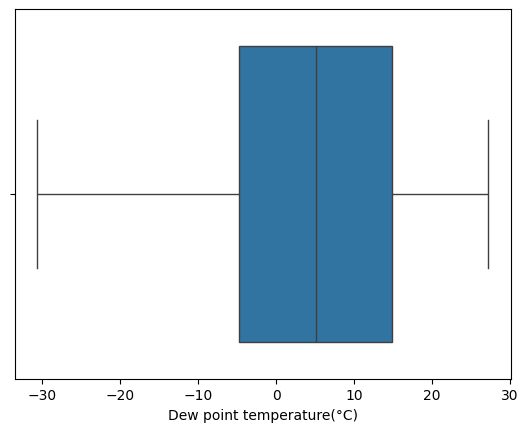

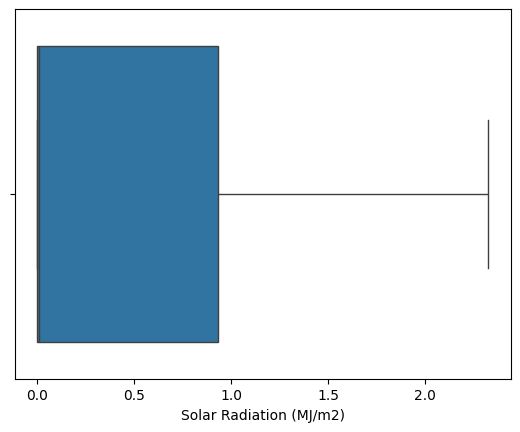

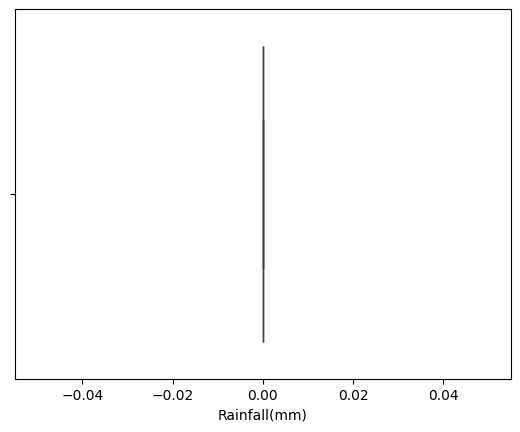

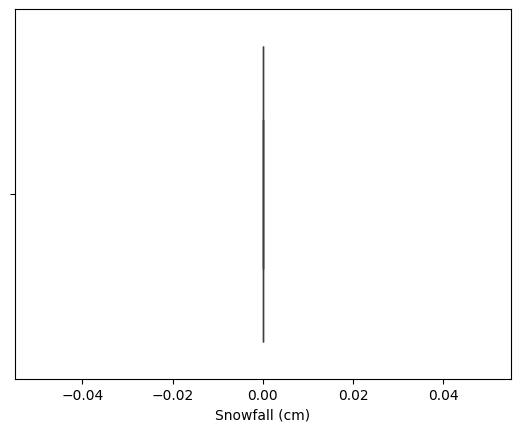

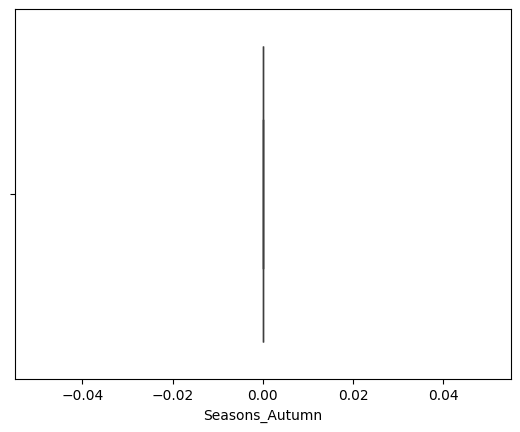

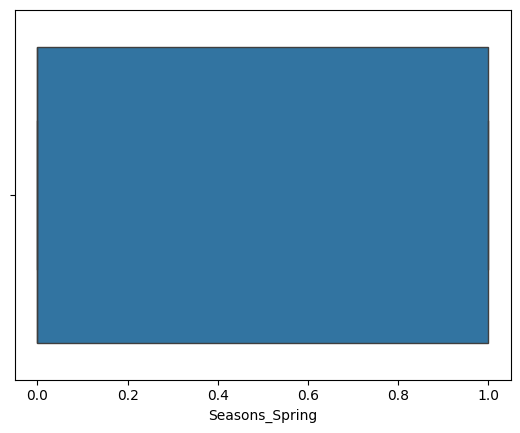

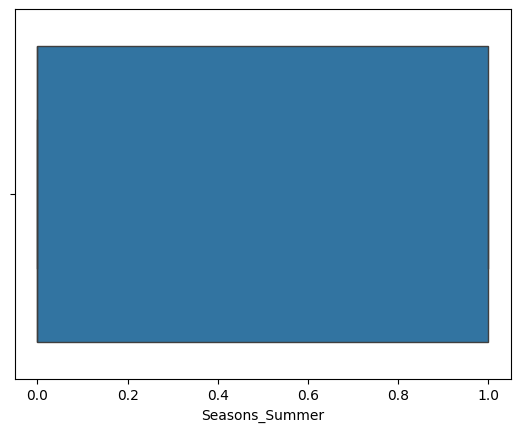

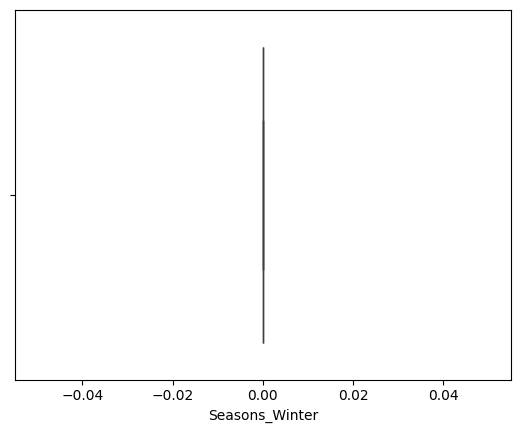

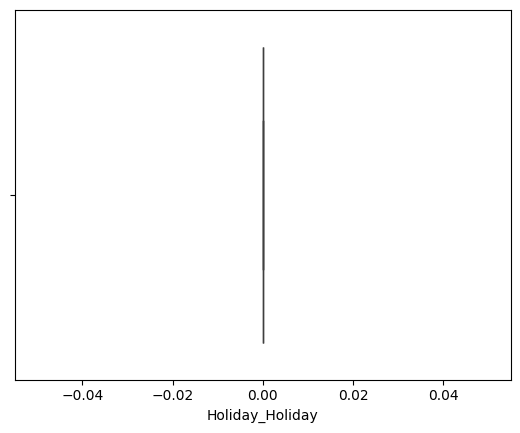

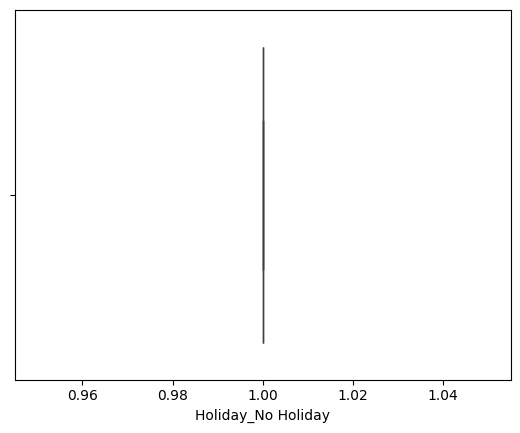

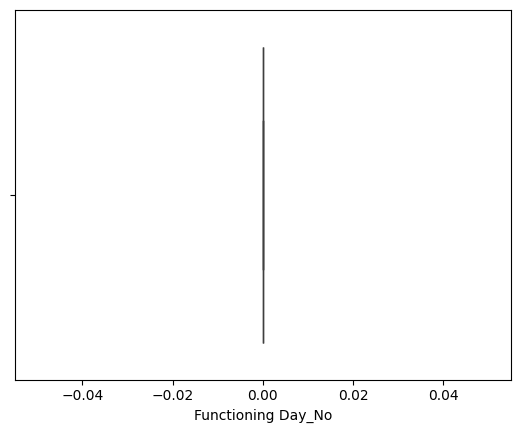

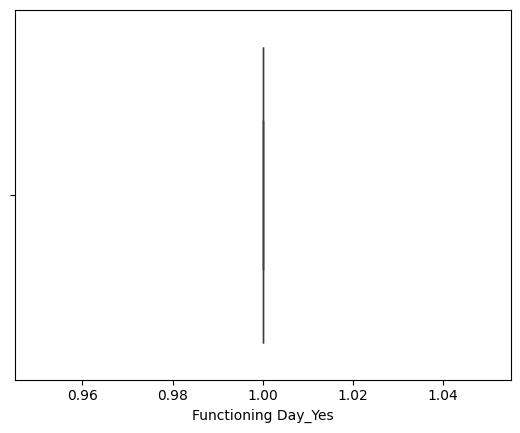

In [ ]:
for column in num_columns:
  sns.boxplot(data=df,x=column)
  plt.show()

I handled outliers using the IQR (Interquartile Range) method by capping values below the lower bound and above the upper bound.

This helped reduce the impact of extreme values and made the data more stable for model training.

---------------------

**Visualization:**

Visualization is the process of creating charts and graphs to help you see patterns, trends, and insights in your data. It makes complex data easier to understand and explain.

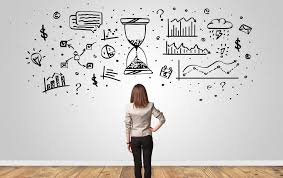

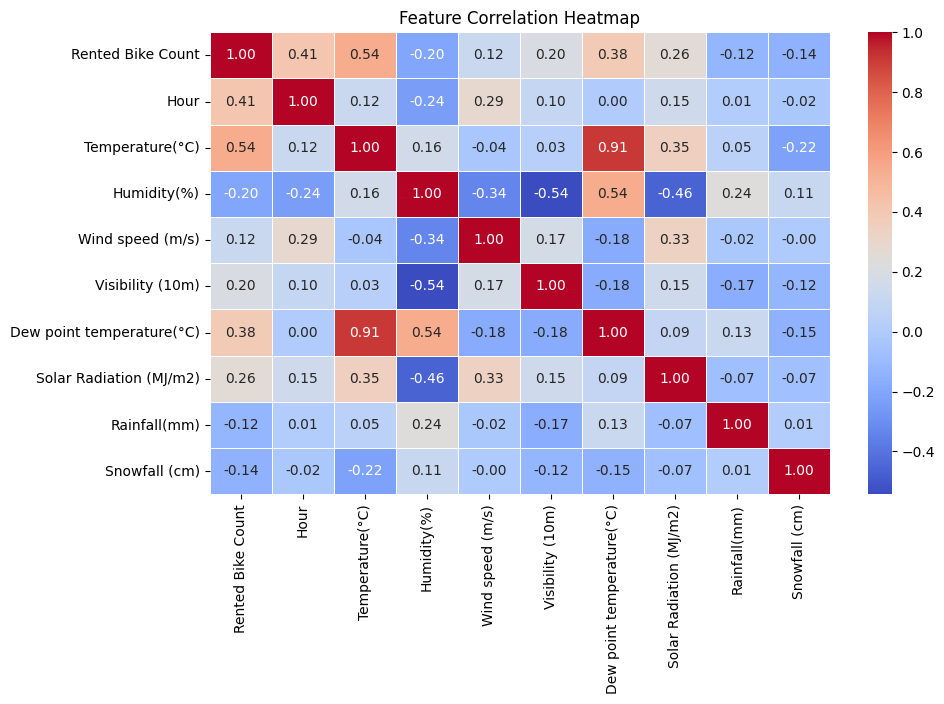

In [ ]:
#"HEAT MAP"
data['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
numerical_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

**Definition:**
A heatmap is a data visualization that uses color to represent values in a matrix. It helps quickly spot patterns, trends, and correlations in the data.

**Output info:**
From the heatmap, we saw that features like Temperature, Hour, Dew Point Temperature, and Solar Radiation had a strong positive or negative correlation with bike rentals. These are important features for predicting demand.

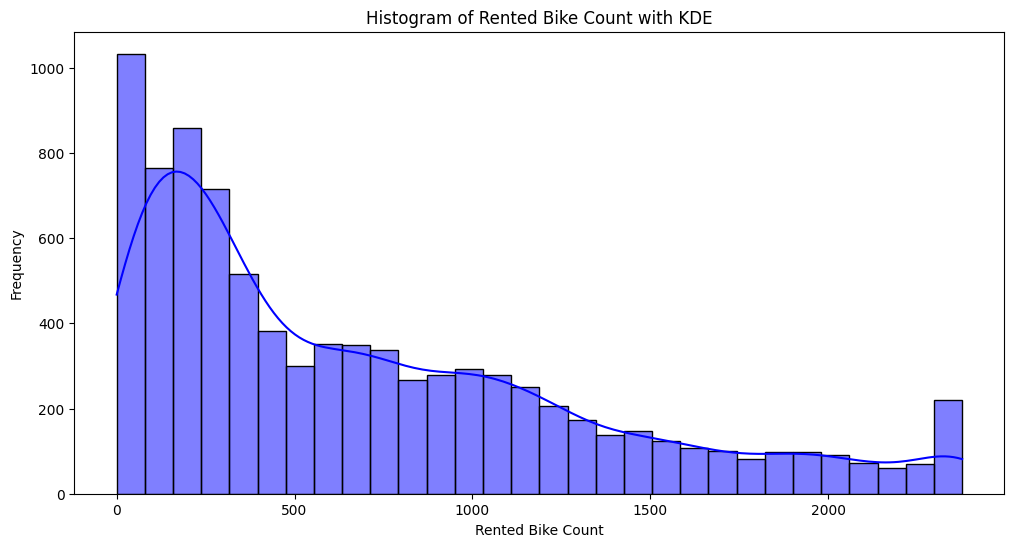

In [ ]:
#"HISTOGRAM"
plt.figure(figsize=(12, 6))
sns.histplot(df["Rented Bike Count"], kde=True, bins=30, color='blue')
plt.title("Histogram of Rented Bike Count with KDE")
plt.xlabel("Rented Bike Count")
plt.ylabel("Frequency")
plt.show()

**Definition:**
A histogram is a simple way to see how your data is spread out by grouping values into bins. It helps you quickly spot where most of your data falls.

**Output info:**
From the plot, we can see that most bike rental counts are on the lower side, meaning bikes were usually rented in smaller numbers. The shape also helps us understand if the data is skewed or spread out evenly.

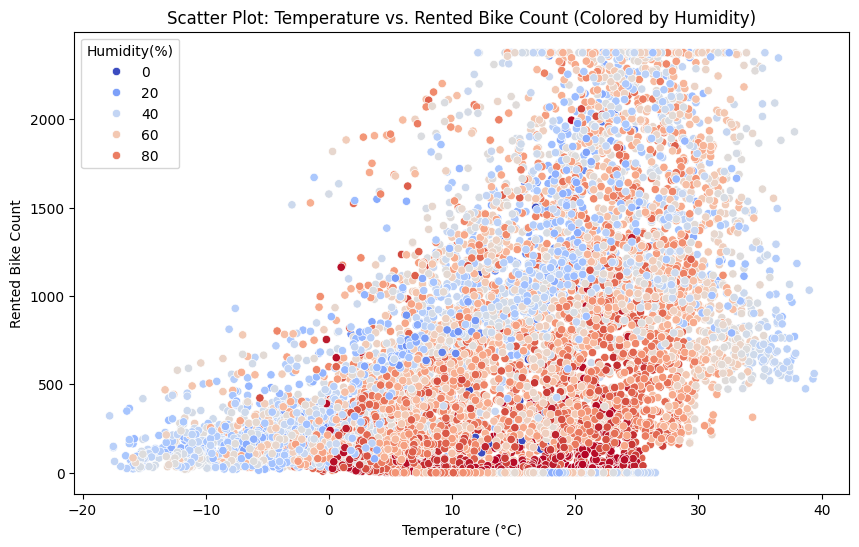

In [ ]:
#"SCATTER PLOT"
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Temperature(°C)"], y=df["Rented Bike Count"], hue=df["Humidity(%)"], palette="coolwarm")
plt.title("Scatter Plot: Temperature vs. Rented Bike Count (Colored by Humidity)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Rented Bike Count")
plt.show()

**Definition:**
A scatter plot uses dots to show how two things are related, making it easy to see patterns, trends, or outliers.

**Output info:**
This scatter plot shows how bike rentals change with temperature. As the temperature goes up, more bikes are rented. The colors show humidity levels—higher humidity may reduce comfort and affect rentals.

<ipython-input-22-d58bac7c76fe>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["Hour"], y=df["Rented Bike Count"], estimator=sum, ci=None, palette="viridis")
<ipython-input-22-d58bac7c76fe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Hour"], y=df["Rented Bike Count"], estimator=sum, ci=None, palette="viridis")


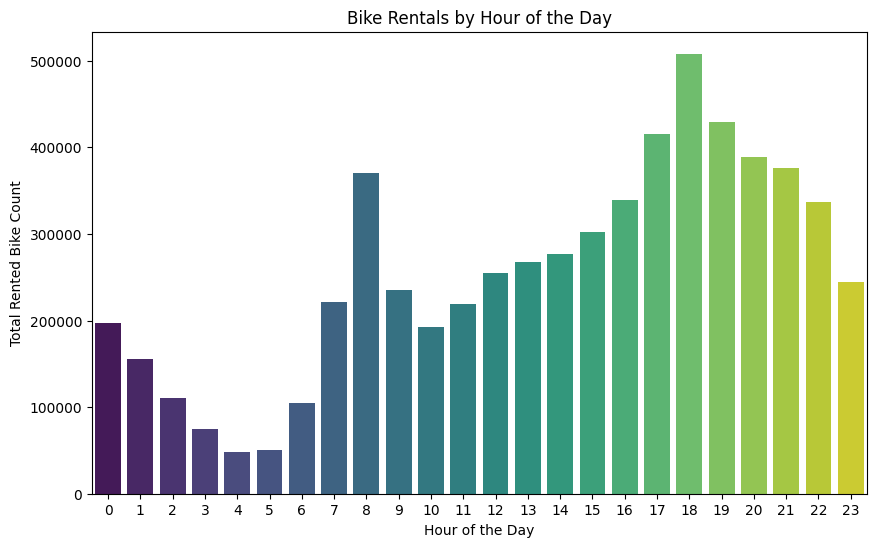

In [ ]:
#"BOX PLOT"
plt.figure(figsize=(10, 6))
sns.barplot(x=df["Hour"], y=df["Rented Bike Count"], estimator=sum, ci=None, palette="viridis")
plt.title("Bike Rentals by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Rented Bike Count")
plt.show()

**Definition:**
A box plot gives a visual summary of your data, showing the middle value, overall spread, and any unusual outliers.

**Output info:**
The box plot shows how bike rentals vary by the hour of the day. It clearly highlights the busy hours, especially during the morning and evening rush. This helps us understand peak times when people are most likely to rent bikes.

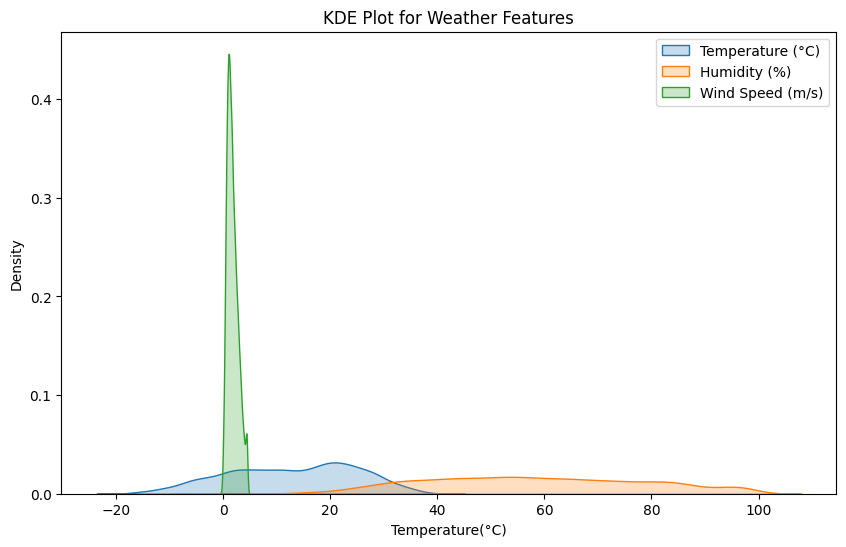

In [ ]:
#"KDE PLOT"
plt.figure(figsize=(10, 6))
sns.kdeplot(df["Temperature(°C)"], label="Temperature (°C)", fill=True)
sns.kdeplot(df["Humidity(%)"], label="Humidity (%)", fill=True)
sns.kdeplot(df["Wind speed (m/s)"], label="Wind Speed (m/s)", fill=True)
plt.legend()
plt.title("KDE Plot for Weather Features")
plt.show()

**Definition:**
 The KDE plot shows that most temperatures cluster around 15°C with slight left skewness, while humidity is fairly spread out and slightly right-skewed. Wind speed is sharply right-skewed, peaking near 0 m/s, indicating calm conditions are most common.

**Output info:**
KDE (Kernel Density Estimate) plot shows the distribution of bike rentals. It gives a smooth curve that helps us understand where most rental counts are concentrated, showing peaks during high demand times and valleys when demand is low..

--------------.---------------.----------------.---------------.--------------.


I used different plots like heatmaps, histograms, scatter plots, bar charts, and KDE plots to explore the data.

These visualizations helped me understand feature relationships, data distribution, trends over time, and how weather conditions affect bike rentals.

-------------------------

**Handling Skewness:**

Handling skewness means fixing imbalances in how your data is distributed. If the data leans too much to one side (left or right), you can apply transformations (like log or Yeo-Johnson) to make it more symmetrical, which helps some models perform better.

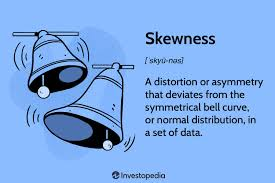

In [ ]:
cols_to_transform = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)']
pt = PowerTransformer(method='yeo-johnson')
data[cols_to_transform] = pt.fit_transform(data[cols_to_transform])

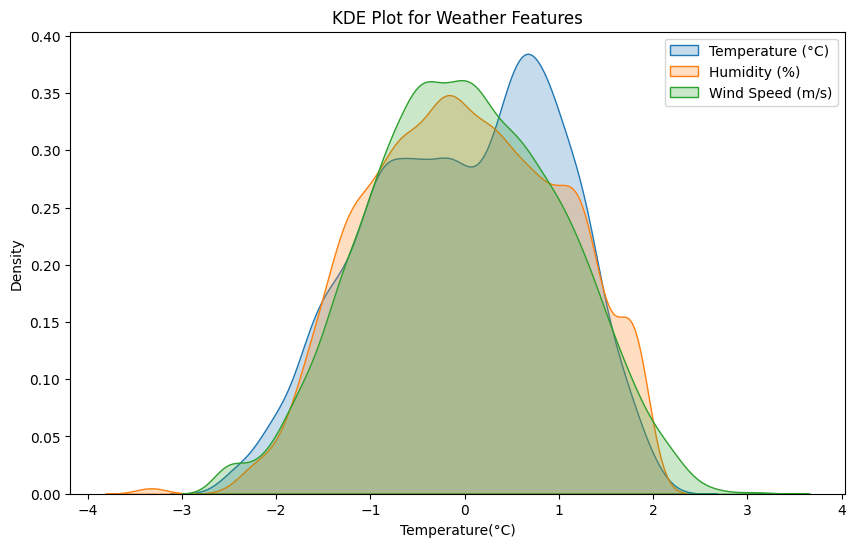

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data["Temperature(°C)"], label="Temperature (°C)", fill=True)
sns.kdeplot(data["Humidity(%)"], label="Humidity (%)", fill=True)
sns.kdeplot(data["Wind speed (m/s)"], label="Wind Speed (m/s)", fill=True)
plt.legend()
plt.title("KDE Plot for Weather Features")
plt.show()

In [ ]:
for col in df.select_dtypes(include=['number']).columns:
    print(f"{col} Skewness: {skew(df[col]):.4f}")

Rented Bike Count Skewness: 1.0031
Hour Skewness: 0.0000
Temperature(°C) Skewness: -0.1983
Humidity(%) Skewness: 0.0596
Wind speed (m/s) Skewness: 0.7146
Visibility (10m) Skewness: -0.7017
Dew point temperature(°C) Skewness: -0.3672
Solar Radiation (MJ/m2) Skewness: 1.2671
Rainfall(mm) Skewness: nan
Snowfall (cm) Skewness: nan
Seasons_Autumn Skewness: nan
Seasons_Spring Skewness: 1.1421
Seasons_Summer Skewness: 1.1421
Seasons_Winter Skewness: nan
Holiday_Holiday Skewness: nan
Holiday_No Holiday Skewness: nan
Functioning Day_No Skewness: nan
Functioning Day_Yes Skewness: nan


<ipython-input-26-53e5bbfe8c59>:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  print(f"{col} Skewness: {skew(df[col]):.4f}")


I used the Yeo-Johnson transformation to reduce skewness in features like Temperature, Humidity, and Wind Speed.

This made the data more normally distributed, which helps improve model accuracy.

------------------------

**Feature Selection(SelectKBest algorithm):**

SelectKBest is a method used to pick the best features (columns) from your data based on how strongly they relate to the target. It scores each feature and keeps only the top ones, helping your model focus on what matters most.

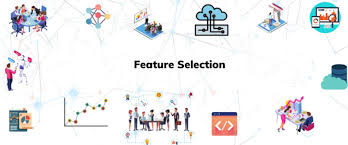

In [ ]:
x=df.drop(columns=['Rented Bike Count','Date'],axis=1)
y=df['Rented Bike Count']


In [ ]:
selecter=SelectKBest(score_func=f_regression,k=6)
x_new=selecter.fit_transform(x,y)
selected_feature=x.columns[selecter.get_support()]
feature_score=pd.DataFrame({'Feature':x.columns,'Score':selecter.scores_}).sort_values(by='Score',ascending=False)
print(feature_score)

                      Feature        Score
1             Temperature(°C)  3691.069747
0                        Hour  1802.883739
5   Dew point temperature(°C)  1515.965354
11             Seasons_Summer   855.164431
6     Solar Radiation (MJ/m2)   706.109013
2                 Humidity(%)   370.510428
4            Visibility (10m)   367.061605
3            Wind speed (m/s)   137.270437
10             Seasons_Spring     5.380765
8               Snowfall (cm)     0.000000
7                Rainfall(mm)     0.000000
9              Seasons_Autumn     0.000000
12             Seasons_Winter     0.000000
13            Holiday_Holiday     0.000000
14         Holiday_No Holiday     0.000000
15         Functioning Day_No     0.000000
16        Functioning Day_Yes     0.000000


In [ ]:
x_selected=x[selected_feature]
x_selected.head()

Hour  Temperature(°C)  Humidity(%)  Dew point temperature(°C)  \
0     0             -5.2           37                      -17.6   
1     1             -5.5           38                      -17.6   
2     2             -6.0           39                      -17.7   
3     3             -6.2           40                      -17.6   
4     4             -6.0           36                      -18.6   

   Solar Radiation (MJ/m2)  Seasons_Summer  
0                      0.0               0  
1                      0.0               0  
2                      0.0               0  
3                      0.0               0  
4                      0.0               0

I used the SelectKBest method with f_regression to pick the top 6 features most related to bike rentals.

This helped reduce unnecessary data and focused the model on the most important inputs, improving performance.

-----------------

**Train_Test_Split:**

Train-test split is the process of dividing your dataset into two parts: one to train the model (training set) and one to test how well it performs (testing set). This helps you see if your model can handle new, unseen data.

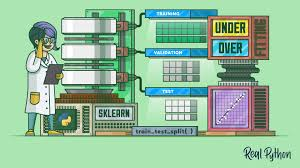

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_selected, y, test_size=0.2, random_state=42)
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (7008, 6)
Testing features shape: (1752, 6)
Training target shape: (7008,)
Testing target shape: (1752,)


I split the dataset into training and testing sets using an 80-20 ratio.

This helps in training the model on one part and checking its accuracy on unseen data

------------------

**Scaler:**

A scaler adjusts the values in your data so that they're on the same scale—usually between 0 and 1, or with a standard range. This helps many machine learning models work better and faster, especially ones sensitive to the size of numbers.

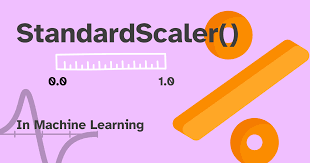

In [ ]:
Ss=StandardScaler()
x_test_scaled=Ss.fit_transform(X_test)
x_train_scaled=Ss.fit_transform(X_train)

I used StandardScaler to normalize the selected features so that all values are on the same scale.

This makes the model learn better and improves prediction accuracy.

-------------------

**Building Model and Evaluation:**

Building a regression model means training it to predict a continuous value—like price, temperature, or bike rentals—based on your input features. Once built, you evaluate how well it performs using metrics like MAE, MSE, RMSE, or R² score to check how close the predictions are to the actual values.

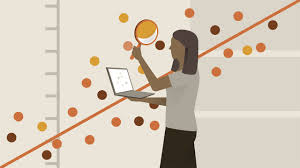

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [ ]:
print("\n Training Models")
models={
    'Linear Regression':LinearRegression(),
    'Random Forest':RandomForestRegressor(),
    'Decision Tree':DecisionTreeRegressor(),
    'SVR':SVR()
}



 Training Models


In [ ]:
result={}
for name,model in models.items():
  print(f"Training {name}")
  model.fit(x_train_scaled,y_train)
  y_pred=model.predict(x_test_scaled)

  result[name]={
      'MSE':mean_squared_error(y_test,y_pred),
      'MAE':mean_absolute_error(y_test,y_pred),
      'R2':r2_score(y_test,y_pred)
  }


Training Linear Regression
Training Random Forest
Training Decision Tree
Training SVR


In [ ]:
print("\n Model Evaluation")
for model_name,metrics in result.items():
  print(f"{model_name}:")
  for metric_name,metric_value in metrics.items():
    print(f"{metric_name}:{metric_value}")


 Model Evaluation
Linear Regression:
MSE:211017.61494466724
MAE:346.1450127106981
R2:0.4634848396828569
Random Forest:
MSE:113022.80836529675
MAE:211.46643275712114
R2:0.7126379702211048
Decision Tree:
MSE:221087.1275863299
MAE:283.0206906392694
R2:0.4378829666322409
SVR:
MSE:245286.61590387995
MAE:343.7552552899636
R2:0.3763554379579751


In [ ]:
print("The best model is Random Forest Regressor")

The best model is Random Forest Regressor


I trained four different models: Linear Regression, Random Forest, Decision Tree, and SVR.

After evaluating them using MSE, MAE, and R² score, Random Forest performed the best with the highest accuracy.

**Conclusion:**

In this project, I analyzed the Seoul Bike Sharing dataset to understand rental patterns and build a model to predict bike demand. I started with data cleaning, handled missing and duplicate values, and performed encoding and feature selection. I also visualized the data using different plots to explore trends and distributions.

After splitting and scaling the data, I trained multiple models and evaluated their performance. Among them, the **Random Forest Regressor** gave the best results with the highest accuracy.

This project helped me understand the full data science workflow—from preprocessing to model evaluation—and gave me valuable insights into how different factors like temperature, humidity, and time influence bike rentals in Seoul.